# E12: 나랑 닮은 연예인을 찾아보자

In [1]:
import face_recognition
import os
from collections import defaultdict
from PIL import Image
from IPython.display import Image as ImgD
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import math

IMG_DIR_PATH = './data'

MY_IMG_NAMES = ['me_0','me_1']
NUM_MY_IMGS = 2

COMP_NAME_LIST = ['jiw','ksy','ljh','lso','lyh','phj']
NUM_COMP_IMGS = 6

img_dict = {}
face_location_dict = {}
embedding_dict = {}

## 사진 모으기
### 내 사진 2장

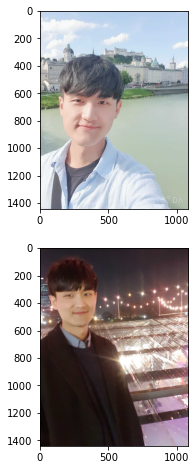

In [2]:
figsize = (16,8)
f,axes = plt.subplots(nrows = 2, ncols= 1, figsize= figsize)

image_path_1 = os.path.join(IMG_DIR_PATH,'{}.jpg'.format(MY_IMG_NAMES[0]))
image_path_2 = os.path.join(IMG_DIR_PATH,'{}.jpg'.format(MY_IMG_NAMES[1]))

original_me_1 = Image.open(image_path_1)
original_me_2 = Image.open(image_path_2)

axes[0].imshow(original_me_1)
axes[1].imshow(original_me_2)

### 연예인 사진들
닮았다고 생각해본 연예인이 없어서 [여기](http://www.pictriev.com/)에 사진 넣고 찾아보았다.

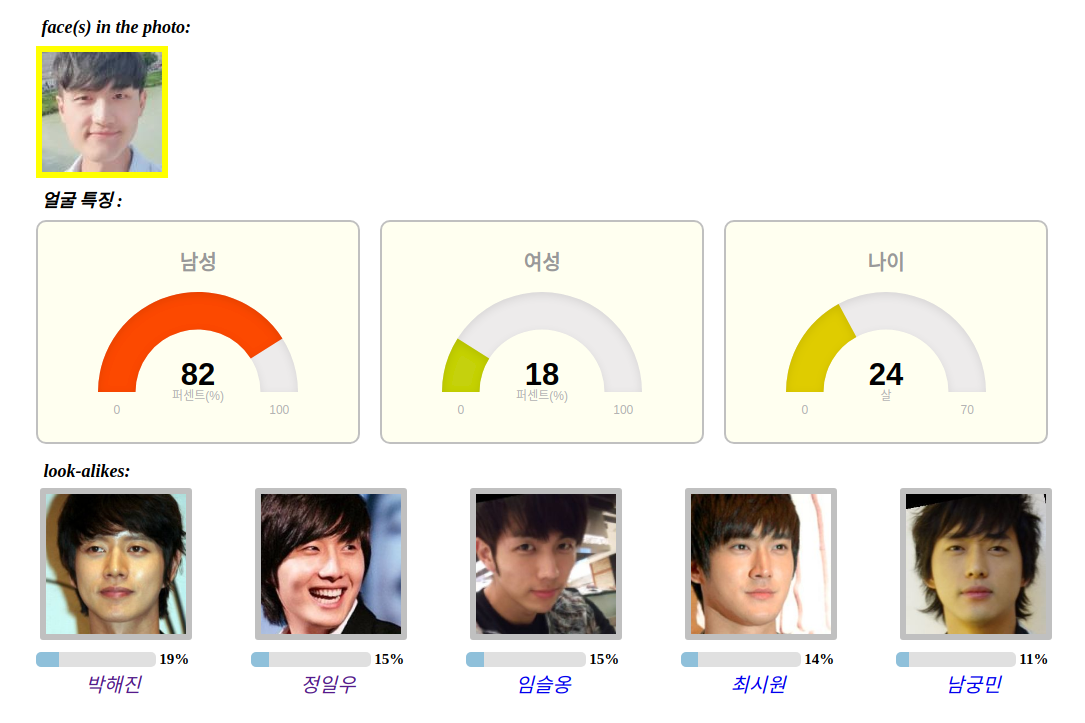

In [3]:
ImgD('data/sim_0.png')

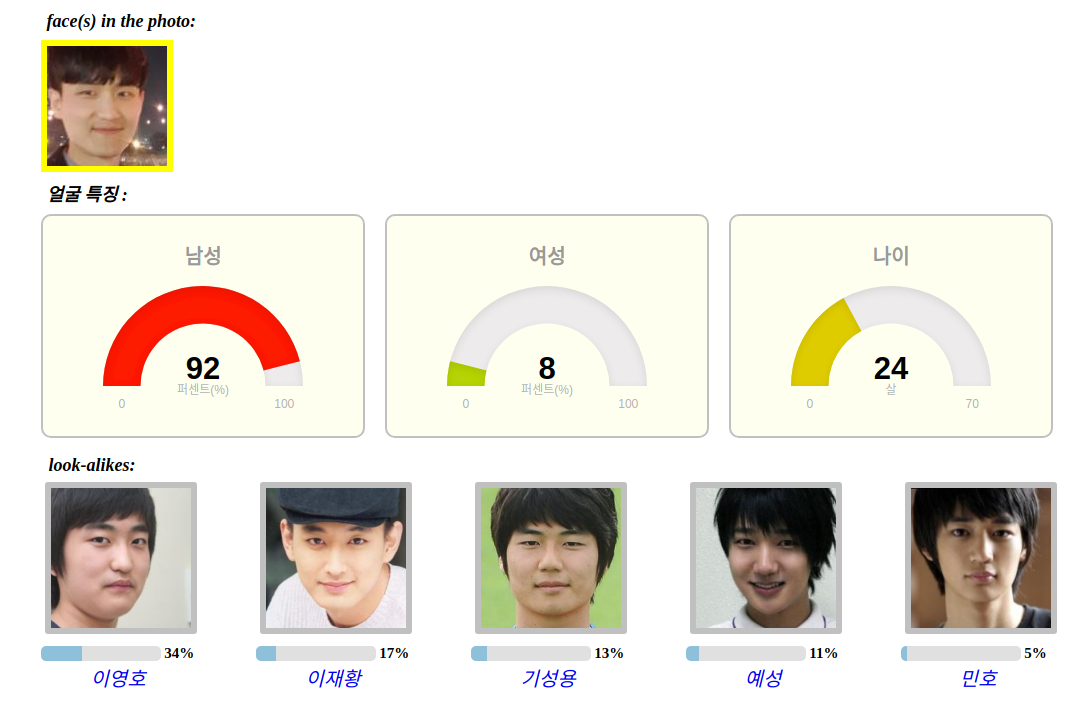

In [4]:
ImgD('data/sim_1.png')

박해진님과 이영호님의 조합이라니... 당황스럽다. 그래도 찾아준 정성이 있으니 각각의 결과에서 1위~3위의 사진을 수집하여 진행해보도록 하겠다.

## 얼굴 영역 자르기

### utils
1. 사진 불러와서 얼굴 자르기
2. 결과물 확인하기

In [5]:
def crop_face(NUM_IMGS,prefix, img_dict, face_location_dict):

    for i in range(NUM_IMGS):
        img_dict[i] = None
        face_location_dict[i] = None
        
        if prefix is 'me':
            key_form = '{0}_{1}'.format(prefix,i)
        else:
            key_form = COMP_NAME_LIST[i]

        try:
            image_path = os.path.join(IMG_DIR_PATH,'{}.jpg'.format(key_form)) 
            if image_path:                
                image = face_recognition.load_image_file(image_path)                
                if len(image)!=0:            
                    img_dict[key_form] = image
                    face_location = face_recognition.face_locations(image)   
                    if len(face_location) != 0:
                        face_location_dict[key_form] = face_location
                        pillow_image = Image.fromarray(face_location)
                        cropped_path = os.path.join(IMG_DIR_PATH,'cropped_{0}_{1}.jpg'.format(prefix,i)) 
                        pillow_image.save(cropped_path)                   
        except:
            pass

    return img_dict, face_location_dict

In [6]:
def show_crop_faces(NUM_IMGS,prefix, img_dict, face_location_dict):

    if NUM_IMGS <3:
        _row_cal = NUM_IMGS
    else:
        _row_cal = 3

    _col_cal = math.ceil(NUM_IMGS/3)
   
    _row_coef = 4
    _col_coef = 3
    
    figsize = (_row_cal*_row_coef, _col_cal*_col_coef)

    f,axes = plt.subplots(nrows = _row_cal, ncols= _col_cal, figsize= figsize)
    
    for i in range(NUM_IMGS): 
        if prefix is 'me':
            key_form = '{0}_{1}'.format(prefix,i)
        else:
            key_form = COMP_NAME_LIST[i]

        image = img_dict[key_form]
        face_location = face_location_dict[key_form]
        
        if image is not None and face_location is not None:
            a, b, c, d = face_location[0]
            cropped_face =image[a:c,d:b,:]
            if _col_cal == 1 :
                axes[i%3].imshow(cropped_face)
            else :
                axes[i%3,i//3].imshow(cropped_face)

### 얼굴 자르기


In [7]:
# 나
my_img_prefix = 'me'
img_dict, face_location_dict = crop_face(NUM_MY_IMGS,my_img_prefix, img_dict, face_location_dict)

# 비교인물
img_dict, face_location_dict = crop_face(NUM_COMP_IMGS,'comp', img_dict, face_location_dict)

### 잘린 얼굴 보이기

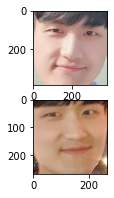

In [8]:
show_crop_faces(NUM_MY_IMGS,'me', img_dict,face_location_dict)

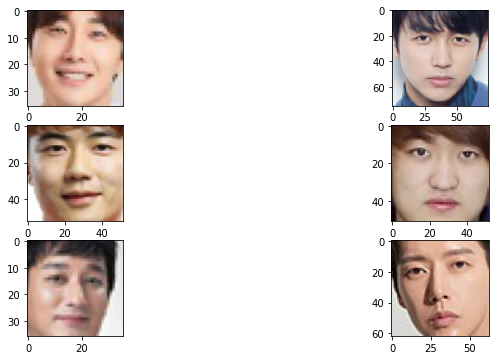

In [9]:
show_crop_faces(NUM_COMP_IMGS,'comp', img_dict,face_location_dict)

## 얼굴 영역의 임베딩 추출하기

### 내 얼굴

In [10]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

prefix = 'me'

for i in range(NUM_MY_IMGS):

    key_form = '{0}_{1}'.format(prefix,i) 

    img = img_dict[key_form]
    embedding = get_face_embedding(img)  
    embedding_dict[key_form]= np.array(embedding)

### 내 사진 두 장 간의 거리

In [11]:
distances = np.linalg.norm(embedding_dict['me_0']-embedding_dict['me_1'], axis=1, ord=2)
distances

array([0.35129145])

In [12]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('me_0', 'me_1')

0.35129144990656425

### 대상 얼굴

In [13]:
for i in range(NUM_COMP_IMGS):

    key_form = COMP_NAME_LIST[i]

    img = img_dict[key_form]
    embedding = get_face_embedding(img)  
    embedding_dict[key_form]= np.array(embedding)

In [14]:
embedding_dict

{'me_0': array([[-1.07298084e-01,  4.63014022e-02, -3.94625701e-02,
         -8.89382735e-02, -1.77348450e-01,  9.74653196e-03,
         -6.74677417e-02, -4.47143689e-02,  8.60996842e-02,
         -9.34233144e-02,  1.56781599e-01, -7.45831877e-02,
         -2.20193312e-01, -7.48025849e-02, -2.51979288e-02,
          1.64510846e-01, -9.74303037e-02, -1.62118092e-01,
         -5.22214994e-02,  2.26476416e-03,  6.39192984e-02,
          2.13392805e-02, -2.23405492e-02,  5.36896326e-02,
         -1.29472837e-01, -3.21575403e-01, -8.29297453e-02,
         -1.40880281e-02, -9.60507896e-03, -7.15169013e-02,
         -4.91820648e-02,  1.88782550e-02, -2.04656899e-01,
         -4.66746837e-02,  3.89988311e-02,  9.64699686e-02,
         -2.58110277e-02, -8.26576166e-03,  1.62155196e-01,
          5.21881171e-02, -2.80349612e-01,  7.83046335e-02,
          7.28372782e-02,  2.67402232e-01,  2.11282000e-01,
          8.58096853e-02, -1.94675829e-02, -1.17130511e-01,
          1.12285294e-01, -1.693

## 나와 닮은 사람 찾기

In [15]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):     
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func(name1='me_0')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('이름') 라고 호출할 때 'me_0'과 '이름' 사이의 임베딩 벡터 거리를 계산합니다.

In [16]:
sorted(embedding_dict.items(), key=lambda x: sort_key_func(name2=x[0]))

[('me_0',
  array([[-1.07298084e-01,  4.63014022e-02, -3.94625701e-02,
          -8.89382735e-02, -1.77348450e-01,  9.74653196e-03,
          -6.74677417e-02, -4.47143689e-02,  8.60996842e-02,
          -9.34233144e-02,  1.56781599e-01, -7.45831877e-02,
          -2.20193312e-01, -7.48025849e-02, -2.51979288e-02,
           1.64510846e-01, -9.74303037e-02, -1.62118092e-01,
          -5.22214994e-02,  2.26476416e-03,  6.39192984e-02,
           2.13392805e-02, -2.23405492e-02,  5.36896326e-02,
          -1.29472837e-01, -3.21575403e-01, -8.29297453e-02,
          -1.40880281e-02, -9.60507896e-03, -7.15169013e-02,
          -4.91820648e-02,  1.88782550e-02, -2.04656899e-01,
          -4.66746837e-02,  3.89988311e-02,  9.64699686e-02,
          -2.58110277e-02, -8.26576166e-03,  1.62155196e-01,
           5.21881171e-02, -2.80349612e-01,  7.83046335e-02,
           7.28372782e-02,  2.67402232e-01,  2.11282000e-01,
           8.58096853e-02, -1.94675829e-02, -1.17130511e-01,
           1.1

In [17]:
def get_nearest_face(name, top=8):
    sort_key_func_2 = get_sort_key_func(name1= name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func_2(name2=x[0]))
    for i in range(top):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
           continue
        if sorted_faces[i]:
             print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func_2(sorted_faces[i][0])))

In [18]:
get_nearest_face('me_0')

순위 1 : 이름(me_1), 거리(0.35129144990656425)
순위 2 : 이름(lso), 거리(0.3892230966481777)
순위 3 : 이름(lyh), 거리(0.40215677838656155)
순위 4 : 이름(ksy), 거리(0.4609897694296972)
순위 5 : 이름(ljh), 거리(0.46377298863231253)
순위 6 : 이름(jiw), 거리(0.4703960746776955)
순위 7 : 이름(phj), 거리(0.5428889353219916)


역시 나와 가장 비슷한 사람은 나이니까, me_1 이 가장 먼저 나온 것이 맞다.   
그리고 이후 순서는   
1. lso : 임슬옹   
2. lyh : 이영호   
3. ksy : 기성용   
4. ljh : 이재황   
5. jiw : 정일우   
6. phj : 박해진   

비교 대상을 찾기 위해 사용했던 사이트에서 알려준 결과와 조금 차이가 있다는 것을 알 수 있다! 그렇다면, 나의 다른 이미지(me_1) 로 찾아보면 어떨까?

In [19]:
get_nearest_face('me_1')

순위 1 : 이름(me_0), 거리(0.35129144990656425)
순위 2 : 이름(lyh), 거리(0.38825185110533567)
순위 3 : 이름(ljh), 거리(0.476915325350777)
순위 4 : 이름(ksy), 거리(0.4804742020237217)
순위 5 : 이름(lso), 거리(0.4859604149418864)
순위 6 : 이름(jiw), 거리(0.5137064242417723)
순위 7 : 이름(phj), 거리(0.5984997824654421)


역시 나와 가장 비슷한 사람은 나인것은 그대로이다. 그 이후 순위로는   
1. lyh : 이영호    
2. ljh : 이재황   
3. ksy : 기성용     
4. lso : 임슬옹     
5. jiw : 정일우     
6. phj : 박해진   

아무래도 이영호님이랑 나랑 꽤나 비슷하게 생겼나보다 ㅋㅋㅋㅋ

# 결과보고서

face_recognition 모듈을 통해 나의 얼굴 사진 2장과 다른 6명의 얼굴 사진에서 얼굴을 찾아내고 찾아낸 이미지를 임베딩 시켰다.
그리고 임베딩된 벡터를 L2 거리를 계산하여 나와 닮은 순위를 만들어보았다.

사실 얼굴사진 0번이 다른 이미지였는데, face_recognitnion 모듈이 사진에서 내 얼굴을 인식하지 못해서 다른 이미지로 교체하였다.
인식률이 아주 높다고 하는데, 얼굴로 인식하지 못했다고 하니 조금 씁쓸하긴 했다... ㅎㅎ